# Import All Required Libraries

In [19]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

# Set style for better visualizations
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

# Load and Inspect Data

In [20]:
# Cell 2: Load your data
# Replace 'your_data_file.csv' with your actual file path
df = pd.read_csv(
    "/Users/Mikail/Desktop/Projects/Revenue vs Expenses Analysis/data/Financials.csv"
)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (700, 16)

Column Names:
['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ', ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ', '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number', ' Month Name ', 'Year']

First 5 rows:


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [21]:
# Cell 3: Data overview
print("Dataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year     

,Month Number,Year
count,700.000000,700.000000
mean,7.900000,2013.750000
std,3.377321,0.433322
min,1.000000,2013.000000
25%,5.750000,2013.750000
50%,9.000000,2014.000000
75%,10.250000,2014.000000
max,12.000000,2014.000000


# Data Cleaning and Preparation

In [23]:
# Enhanced data cleaning and preparation
print("🧹 Cleaning data...")

# Create a copy of the dataframe
df_clean = df.copy()

# Verify no missing values before cleaning
print("\nMissing values - before cleaning:")
print(df.isnull().sum())


# Convert Date column from DD/MM/YYYY to datetime
df_clean["Date"] = pd.to_datetime(df_clean["Date"], format="%d/%m/%Y")

# Sort by date (oldest to newest)
df_clean = df_clean.sort_values("Date")

# Clean column names (remove extra spaces and change to lower case)
df_clean.columns = df_clean.columns.str.strip().str.replace(" ", "_").str.lower()

print("\nCleaned column names:")
print(df_clean.columns.tolist())

# Display basic info about the data
print(f"\nTotal records: {len(df_clean):,}")
print(f"Number of unique products: {df_clean['product'].nunique()}")
print(f"Number of unique segments: {df_clean['segment'].nunique()}")
print(f"Number of unique countries: {df_clean['country'].nunique()}")
df_clean[
    [
        "profit",
        "units_sold",
        "manufacturing_price",
        "sale_price",
        "gross_sales",
        "discounts",
        "sales",
        "cogs",
    ]
].head(20)

🧹 Cleaning data...

Missing values - before cleaning:
Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64

Cleaned column names:
['segment', 'country', 'product', 'discount_band', 'units_sold', 'manufacturing_price', 'sale_price', 'gross_sales', 'discounts', 'sales', 'cogs', 'profit', 'date', 'month_number', 'month_name', 'year']

Total records: 700
Number of unique products: 6
Number of unique segments: 5
Number of unique countries: 5


,profit,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs
202,"$24,343.20","$2,646.00",$120.00,$20.00,"$52,920.00","$2,116.80","$50,803.20","$26,460.00"
626,"$(12,787.50)","$1,023.00",$3.00,$125.00,"$1,27,875.00","$17,902.50","$1,09,972.50","$1,22,760.00"
336,"$11,577.45","$2,931.00",$10.00,$15.00,"$43,965.00","$3,077.55","$40,887.45","$29,310.00"
179,"$6,771.20",$736.00,$120.00,$20.00,"$14,720.00",$588.80,"$14,131.20","$7,360.00"
523,"$2,194.25",$655.00,$120.00,$15.00,"$9,825.00","$1,080.75","$8,744.25","$6,550.00"
173,"$3,150.40","$1,760.00",$10.00,$7.00,"$12,320.00",$369.60,"$11,950.40","$8,800.00"
602,"$2,013.00",$660.00,$120.00,$15.00,"$9,900.00","$1,287.00","$8,613.00","$6,600.00"
317,"$1,556.81","$1,031.00",$10.00,$7.00,"$7,217.00",$505.19,"$6,711.81","$5,155.00"
314,"$15,772.40","$1,834.00",$3.00,$20.00,"$36,680.00","$2,567.60","$34,112.40","$18,340.00"
580,"$3,270.80",$442.00,$3.00,$20.00,"$8,840.00","$1,149.20","$7,690.80","$4,420.00"


# CLEAN NUMERIC COLUMNS

In [24]:
# CLEANING FUNCTION


def clean_money(col):
    return (
        col.astype(str)
        .str.strip()
        .str.replace("-", "", regex=False)  # remove "-" used as missing
        .str.replace(r"[\$,]", "", regex=True)  # remove $ and commas
        .str.replace(r"\((.*)\)", r"-\1", regex=True)  # convert (1234.56) → -1234.56
    )

In [25]:
# CONVERT ALL NUMBER COLUMNS

numeric_cols = [
    "units_sold",
    "manufacturing_price",
    "sale_price",
    "gross_sales",
    "discounts",
    "sales",
    "cogs",
    "profit",
]

for col in numeric_cols:
    df_clean[col] = clean_money(df_clean[col])
    df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

    print(f"   ✅ Cleaned column: {col}")

# Verify no missing values before cleaning
print("\nMissing values - after cleaning:")
print(df.isnull().sum())

print("Cleaned Dataset Info:")
df_clean[numeric_cols].head(20)

   ✅ Cleaned column: units_sold
   ✅ Cleaned column: manufacturing_price
   ✅ Cleaned column: sale_price
   ✅ Cleaned column: gross_sales
   ✅ Cleaned column: discounts
   ✅ Cleaned column: sales
   ✅ Cleaned column: cogs
   ✅ Cleaned column: profit

Missing values - after cleaning:
Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64
Cleaned Dataset Info:


,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit
202,2646.0,120.0,20.0,52920.0,2116.80,50803.20,26460.0,24343.20
626,1023.0,3.0,125.0,127875.0,17902.50,109972.50,122760.0,-12787.50
336,2931.0,10.0,15.0,43965.0,3077.55,40887.45,29310.0,11577.45
179,736.0,120.0,20.0,14720.0,588.80,14131.20,7360.0,6771.20
523,655.0,120.0,15.0,9825.0,1080.75,8744.25,6550.0,2194.25
173,1760.0,10.0,7.0,12320.0,369.60,11950.40,8800.0,3150.40
602,660.0,120.0,15.0,9900.0,1287.00,8613.00,6600.0,2013.00
317,1031.0,10.0,7.0,7217.0,505.19,6711.81,5155.0,1556.81
314,1834.0,3.0,20.0,36680.0,2567.60,34112.40,18340.0,15772.40
580,442.0,3.0,20.0,8840.0,1149.20,7690.80,4420.0,3270.80


In [26]:
# FIX NaN DISCOUNTS

df_clean["discounts"] = df_clean["discounts"].fillna(0)
print("\nFirst 5 rows:")
df_clean["discounts"].head(20)


First 5 rows:


202     2116.80
626    17902.50
336     3077.55
179      588.80
523     1080.75
173      369.60
602     1287.00
317      505.19
314     2567.60
580     1149.20
42         0.00
575     3975.84
500     1326.60
562    26166.00
72      7494.00
537    36240.00
535      292.60
532    13021.25
152    18868.50
522     6171.00
Name: discounts, dtype: float64

# CALCULATE FINANCIAL COLUMNS

In [ ]:
# Gross Sale(recompute if needed); prefer existing columns where available
if "units_sold" in df_clean.columns and "sale_price" in df_clean.columns:
    df_clean["gross_sales_calc"] = df_clean["units_sold"] * df_clean["sale_price"]
else:
    df_clean["gross_sales_calc"] = df_clean.get("gross_sales")

# Net Sales: gross_sales - discounts (use gross_sales_calc if gross_sale is missing )
df_clean["gross_sales"] = df_clean["gross_sales"].fillna(df_clean["gross_sales_calc"])
df_clean["net_sales_calc"] = df_clean["gross_sales"] - df_clean["discounts"]

# CoOGS: prefer existing, else compute from manufacturing_price * units_sold
if "cogs" not in df_clean.columns or df_clean["cogs"].isna().all():
    if "manufacturing_price" in df_clean.columns and "units_sold" in df_clean.columns:
        df_clean["cogs"] = df_clean["manufacturing_price"] * df_clean["units_sold"]

# Total expenses = cogs (for this dataset we only have COGS as direct expenses)
df_clean["total_expenses"] = df_clean["cogs"]

# Profit calc (recalculate to ensure consistency)
df_clean["profit_calc"] = df_clean["net_sales_calc"] - df_clean["total_expenses"]

# If original profit column exists, keep it for comparison
if "profit" in df_clean.columns:
    df_clean["profit_original"] = df_clean["profit"]

# RATIOS AND FLAGS

In [ ]:
# COGS Ratio
df_clean["cogs_ratio"] = df_clean["total_expenses"] / df_clean["net_sales_calc"]

# Discount Rate
df_clean["discount_rate"] = np.where(
    df_clean["gross_sales"] > 0, df_clean["discounts"] / df_clean["gross_sales"], np.nan
)

# Profit Margin (%)
df_clean["profit_margin"] = df_clean["profit_calc"].apply(
    lambda x: "Profit" if x > 0 else ("Loss" if x < 0 else "Break-even")
)

# Profit Segments
df_clean["profit_segment"] = pd.qcut(
    df_clean["profit_calc"],
    q=[0, 0.25, 0.5, 0.75, 1.0],
    labels=["Low Profit", "Moderate Profit", "High Profit", "Very High Profit"],
)


df_clean["profitability_segment"] = df_clean["profit_calc"].apply(profitability_segment)
df_clean["profit_segment"]

202    Very High Profit
626          Low Profit
336         High Profit
179     Moderate Profit
523          Low Profit
             ...       
511     Moderate Profit
164          Low Profit
163          Low Profit
44          High Profit
451          Low Profit
Name: profit_segment, Length: 700, dtype: category
Categories (4, object): ['Low Profit' < 'Moderate Profit' < 'High Profit' < 'Very High Profit']

# SUMMARY KPIs

In [39]:
total_revenue = df_clean["net_sales_calc"].sum()
total_cogs = df_clean["total_expenses"].sum()
total_profit = df_clean["profit_calc"].sum()
profit_margin_overall = (
    (total_profit / total_revenue) * 100 if total_revenue else np.nan
)

kpis = pd.DataFrame(
    {
        "metric": [
            "total_revenue",
            "total_cogs",
            "total_profit",
            "profit_margin_overall",
        ],
        "value": [total_revenue, total_cogs, total_profit, profit_margin_overall],
    }
)


print(kpis)

                  metric         value
0          total_revenue  1.187264e+08
1             total_cogs  1.018326e+08
2           total_profit  1.689370e+07
3  profit_margin_overall  1.422911e+01


# MONTHLY AND YEARLY AGGREGATION(if date present)

In [41]:
df_clean.head(2)

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,...,net_sales_calc,total_expenses,profit_calc,profit_original,cogs_ratio,discount_rate,profit_margin,profitability_segment,profit_segment,month
202,Government,Canada,Velo,Low,2646.0,120.0,20.0,52920.0,2116.8,50803.2,...,50803.2,26460.0,24343.2,24343.2,0.520833,0.04,Profit,High Profit,Very High Profit,9
626,Enterprise,France,Carretera,High,1023.0,3.0,125.0,127875.0,17902.5,109972.5,...,109972.5,122760.0,-12787.5,-12787.5,1.116279,0.14,Loss,Loss,Low Profit,9


In [42]:
if "date" in df_clean.columns:
    df_clean["year"] = df_clean["date"].dt.year
    df_clean["month"] = df_clean["date"].dt.month
    monthly = (
        df_clean.groupby(["year", "month"])
        .agg(
            net_sales=("net_sales_calc", "sum"),
            cogs=("total_expenses", "sum"),
            profit=("profit_calc", "sum"),
        )
        .reset_index()
    )
    print(monthly.head())
else:
    monthly = None
    Print("Skipping monthly agrregation (No date column)")

   year  month   net_sales       cogs      profit
0  2013      9  4484000.03  3720397.0   763603.03
1  2013     10  9295611.10  7637816.0  1657795.10
2  2013     11  7267203.30  6501701.0   765502.30
3  2013     12  5368441.08  4676877.0   691564.08
4  2014      1  6607761.67  5793733.0   814028.67


# VISUALISATIONS

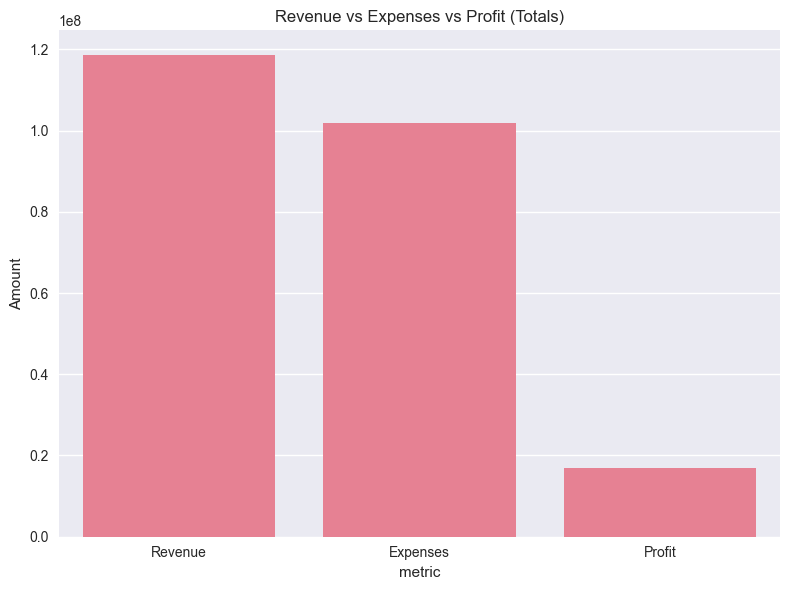

In [43]:
# Executive summary chart + revenue vs expenses bar chart
plt.figure(figsize=(8, 6))
sns.barplot(
    x=kpis["metric"][:3].map(
        {"total_revenue": "Revenue", "total_cogs": "Expenses", "total_profit": "Profit"}
    ),
    y=kpis["value"][:3],
)
plt.title("Revenue vs Expenses vs Profit (Totals)")
plt.ylabel("Amount")
plt.tight_layout()
plt.show()

In [44]:
# Revenue vs Expenses (single bar comparison)
plt.figure(figsize=(6,5))
summary_df = pd.DataFrame({'metric':['Revenue','Expenses'], 'amount':[total_revenue, total_cogs]})
sns.barplot(data=summary_df, x='metric', y='amount')
for p in plt.gca().patches:
plt.gca().annotate(f"{p.get_height():,.0f}", (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.title('Revenue vs Expenses')
plt.tight_layout()
plt.show()

IndentationError: expected an indented block after 'for' statement on line 5 (3719512550.py, line 6)

In [ ]:
# 15) Profitability distribution (histogram + KDE)
plt.figure(figsize=(10, 5))
sns.histplot(df["profit_calc"].dropna(), kde=True, bins=40)
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.tight_layout()
plt.show()

In [ ]:
#  Profit vs Loss by Country (stacked bars)
if 'country' in df_clean.columns:
country_df_clean = df_clean.groupby('country').agg(profit_sum=('profit_calc','sum'))
# separate positive and negative
country_df_clean['profit_pos'] = df_clean[df['profit_calc']>0].groupby('country')['profit_calc'].sum()
country_df_clean['profit_neg'] = df_clean[df_clean['profit_calc']<0].groupby('country')['profit_calc'].sum().fillna(0)
country_df_clean = country_df_clean.fillna(0)
country_df_clean[['profit_pos','profit_neg']].sort_values('profit_pos', ascending=False).head(20).plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Profit (pos) vs Loss (neg) by Country')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

In [ ]:
#  Heatmap: Profitability by month and segment
if 'month' in df.columns and 'profitability_segment' in df.columns:
pivot = df.pivot_table(index='month', columns='profitability_segment', values='profit_calc', aggfunc='sum').fillna(0)
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='RdYlGn')
plt.title('Profit by Month and Profitability Segment')
plt.tight_layout()
plt.show()

In [ ]:
#  Profitability segment analysis and print
seg_counts = df["profitability_segment"].value_counts()
seg_profit = (
    df.groupby("profitability_segment")["profit_calc"]
    .agg(["count", "sum", "mean"])
    .sort_values("sum", ascending=False)
)
print("\nProfitability Segment Counts:\n", seg_counts)
print("\nProfitability Summary:\n", seg_profit)

In [ ]:
#  Export segment summary
seg_profit.to_csv("profitability_segment_summary.csv")
print("Profitability segment summary saved to profitability_segment_summary.csv")

# End of notebook
#
# Deliverables created:
# - cleaned_sales_data.csv (cleaned dataset)
# - monthly_summary.csv (if date present)
# - profitability_segment_summary.csv
#
# Open the cleaned CSV and the summary CSVs for your report and use the plotted charts for the executive summary.

# SAVE CLEANED DATASET AND SUMMARIES

In [ ]:
out_clean = 'cleaned_sales_data.csv'
df_clean.to_csv(out_clean, index=False)
print(f'Cleaned dataset saved to {out_clean}')


if monthly is not None:
monthly.to_csv('monthly_summary.csv', index=False)
print('Monthly summary saved to monthly_summary.csv')

In [ ]:
# Revenue AFTER discount (if sales column exists, this just verifies it)
df_clean["net_sales_calc"] = df_clean["gross_sales"] - df_clean["discounts"]

# Expenses = COGS
df_clean["total_expenses"] = df_clean["cogs"]

# Recompute profit to verify dataset profit is correct
df_clean["profit_calc"] = df_clean["net_sales_calc"] - df_clean["total_expenses"]

# Profit margin
df_clean["profit_margin"] = (df_clean["profit_calc"] / df_clean["net_sales_calc"]) * 100

# COGS ratio
df_clean["cogs_ratio"] = df_clean["cogs"] / df_clean["net_sales_calc"]

# Discount rate
df_clean["discount_rate"] = df_clean["discounts"] / df_clean["gross_sales"]


# Profitability segments
def profitability_segment(margin):
    if margin < 0:
        return "Loss"
    elif margin < 10:
        return "Low Profit"
    elif margin < 20:
        return "Medium Profit"
    else:
        return "High Profit"


df_clean["profitability_segment"] = df_clean["profit_margin"].apply(
    profitability_segment
)

# Analysis by profitability
profitability_counts = df_clean["profitability_segment"].value_counts()
profitability_profit = df_clean.groupby("profitability_segment")["profit_calc"].sum()
profitability_cogs_ratio = df_clean.groupby("profitability_segment")[
    "cogs_ratio"
].mean()
profitability_discount = df_clean.groupby("profitability_segment")[
    "discount_rate"
].mean()

print("\nProfitability Counts:\n", profitability_counts)
print("\nProfit by Segment:\n", profitability_profit)
print("\nAverage COGS Ratio by Segment:\n", profitability_cogs_ratio)
print("\nAverage Discount Rate by Segment:\n", profitability_discount)


#  PROFIT OR LOSS FLAG

df_clean["profit_status"] = df_clean["profit_calc"].apply(
    lambda x: "Loss" if x < 0 else "Profit"
)

# MONTHLY / YEARLY SUMMARIES

In [ ]:
df_clean["month"] = df_clean["date"].dt.month
df_clean["year"] = df_clean["date"].dt.year

monthly_summary = (
    df_clean.groupby(["year", "month"])
    .agg({"net_sales_calc": "sum", "total_expenses": "sum", "profit_calc": "sum"})
    .reset_index()
)

yearly_summary = (
    df_clean.groupby("year")
    .agg({"net_sales_calc": "sum", "total_expenses": "sum", "profit_calc": "sum"})
    .reset_index()
)

total_revenue = df_clean["net_sales_calc"].sum()
total_expense = df_clean["cogs"].sum()
total_profit = df_clean["profit"].sum()

# PRINT SUMMARY TABLES

In [ ]:
print("\n===== SAMPLE CLEANED DATA =====")
print(df_clean.head())

print("\n===== MONTHLY SUMMARY =====")
print(monthly_summary)

print("\n===== YEARLY SUMMARY =====")
print(yearly_summary)

# BASIC VISUALS

In [ ]:
# Data for plotting
summary_df = pd.DataFrame(
    {"Metric": ["Revenue", "Expenses"], "Amount": [total_revenue, total_expense]}
)

plt.figure(figsize=(8, 6))
sns.barplot(data=summary_df, x="Metric", y="Amount")
plt.title("Revenue vs Expenses", fontsize=14)
plt.ylabel("Amount ($)")
plt.xlabel("")
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_summary["profit_calc"])
plt.title("Monthly Profit Trend")
plt.xlabel("Month Index")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(monthly_summary["net_sales_calc"], label="Revenue")
plt.plot(monthly_summary["total_expenses"], label="Expenses")
plt.legend()
plt.title("Revenue vs Expenses Trend")
plt.xlabel("Month Index")
plt.ylabel("Amount")
plt.grid(True)
plt.show()

# Profitability Deep Dive

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x="profitability_segment")

plt.title("Profitability Segment Distribution")
plt.xlabel("Profitability Segment")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

In [ ]:
plt.figure(figsize=(7, 7))
df_clean["profitability_segment"].value_counts().plot(kind="pie", autopct="%1.1f%%")

plt.title("Profitability Distribution (Pie Chart)")
plt.ylabel("")  # removes y-label

plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df_clean["profitability_segment"].value_counts().plot(kind="bar")

plt.title("Profitability Segment Distribution")
plt.xlabel("Profitability Segment")
plt.ylabel("Number of Records")
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

In [ ]:
# Create positive and negative profit columns
df_clean["profit_positive"] = df_clean["profit_calc"].apply(lambda x: x if x > 0 else 0)
df_clean["profit_negative"] = df_clean["profit_calc"].apply(lambda x: x if x < 0 else 0)

country_profit = df_clean.groupby("country")[
    ["profit_positive", "profit_negative"]
].sum()

plt.figure(figsize=(12, 6))
country_profit.plot(kind="bar", figsize=(12, 6))

plt.title("Profit vs Loss by Country")
plt.xlabel("Country")
plt.ylabel("Amount ($)")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

In [ ]:
import seaborn as sns

pivot_heatmap = df_clean.pivot_table(
    index="month_name",
    columns="profitability_segment",
    values="profit_calc",
    aggfunc="sum",
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_heatmap, annot=True, fmt=".0f", cmap="YlGnBu")

plt.title("Profitability Heatmap by Month & Segment")
plt.xlabel("Profitability Segment")
plt.ylabel("Month")

plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Profitability distribution
df_clean["profitability_segment"].value_counts().plot(
    kind="bar", ax=axes[0], title="Profitability Segment Distribution"
)
axes[0].set_xlabel("Segment")
axes[0].set_ylabel("Count")
axes[0].grid(axis="y", linestyle="--", alpha=0.5)

# --- Profit vs Loss by Country
country_profit = df_clean.groupby("country")[
    ["profit_positive", "profit_negative"]
].sum()
country_profit.plot(kind="bar", ax=axes[1], title="Profit vs Loss by Country")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Profit / Loss")
axes[1].grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
df_clean